# Emissie-reducties 

## benodigd in NL om te voldoen aan de verplichtingen volgend uit het klimaatakkoord van Parijs

Uitgangspunt voor dit notebook zijn de totale hoeveelheid emissies, dus niet alleen CO2 maar ook CH4, F-gassen etc. aangezien deze ook bijdragen aan het broeikaseffect. De belangrijkste bron hierbij zijn de tabellen van de Emissieregistratie : http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Emissiedata gedownload van <br>
https://www.clo.nl/indicatoren/nl0165-broeikasgasemissies-in-nederland?ond=20883 <br>
op 29 september 2020

In [51]:
df = pd.read_excel('c-0165-001g-clo-37-nl.xlsx',sheet_name='Emissie broeikasgassen',skiprows=5,index_col=0)

"""
2018 is het laatste jaar met *definitieve* data
""" 
df = df[df.index < 2019]
df.index = df.index.astype(int)
df.tail()

,Mton CO2-equivalenten,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2014,159.197,18.008292,8.558245,1.850063,NaN,NaN,NaN
2015,166.818,18.202621,8.808214,2.044882,NaN,NaN,NaN
2016,166.733,18.329046,8.476745,1.903725,NaN,NaN,NaN
2017,164.898,18.012193,8.657644,1.761858,NaN,NaN,NaN
2018,160.611,17.308777,8.349118,1.928345,NaN,NaN,NaN


De eerste vier kolommen bevatten de data die we nodig hebben (CO2, CH4, N2O, F-gassen). Hieronder tellen we ze op en plotten het resultaat. 

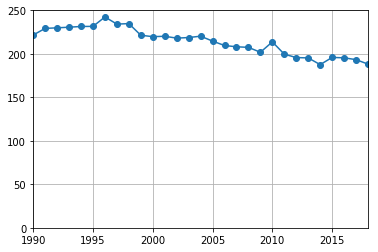

In [33]:
df_emis_NL = df[df.columns[0:4]].sum(axis=1) 
df_emis_NL.plot(marker='o')
plt.ylim((0,250))
plt.grid()

Individuele waardes kunnen vergeleken worden met <br>
http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx

In [40]:
df_emis_NL[2018]

188.19678902343048

In [37]:
print('reductie in 2018 t.o.v. 1990')
print('{:.2f} %'.format((1.0 - df_emis_NL[2018] / df_emis_NL[1990])*100))

reductie in 2018 t.o.v. 1990
15.10 %


Ter referentie, het 4e kabinet Balkenende uit 2007 had als doelstelling in het regeerakkoord had opgenomen om de totale emissies in 2020 gereduceerd te hebben met 30% t.o.v. 1990

Bron: NRC (https://outline.com/8MyPLN)

Deze doelstelling is door latere kabinetten losgelaten. Het Urgenda-vonnis eist alsnog 25% reductie door de staat. 

Bron: https://www.rijksoverheid.nl/actueel/nieuws/2020/04/24/kabinet-neemt-maatregelen-voor-extra-co2-reductie

## Voorgenomen beleid (klimaatwet)
In de klimaatwet is vastgelegd dat emissies in 2030 met 49% worden gereduceerd, en in 2050 met 95%

Bron: https://www.energienieuws.info/2019/05/klimaatwet-aangenomen.html

Met een lineaire daling ziet dat er zo uit: 

In [46]:
# AANNAME 1: het 2020 doel van Urgenda wordt gehaald
emis_NL_2020 = 0.75 * df_emis_NL[1990]
emis_NL_2030 = 0.51 * df_emis_NL[1990]
emis_NL_2050 = 0.05 * df_emis_NL[1990]

In [47]:
emis_NL_2020, emis_NL_2030, emis_NL_2050

(166.24354399106141, 113.04560991392177, 11.082902932737428)

In [52]:
def emissies_2020s(jaar):
    daling_per_jaar = (emis_NL_2020 - emis_NL_2030) / 10
    return emis_NL_2020 - daling_per_jaar * (jaar-2020)

assert(np.isclose(emissies_2020s(2020), emis_NL_2020))
assert(np.isclose(emissies_2020s(2030), emis_NL_2030))

In [53]:
def emissies_2030s_2040s(jaar):
    daling_per_jaar = (emis_NL_2030 - emis_NL_2050) / 20
    return emis_NL_2030 - daling_per_jaar * (jaar-2030)

assert(np.isclose(emissies_2030s_2040s(2030), emis_NL_2030))
assert(np.isclose(emissies_2030s_2040s(2050), emis_NL_2050))

In [54]:
years1 = np.arange(2020, 2031)
emissies1 = list(map(emissies_2020s, years1))

years2 = np.arange(2031, 2051)
emissies2 = list(map(emissies_2030s_2040s, years2))

In [55]:
pwd

'/Users/leo/workspace/S4F/BKG_emissies_NL'

Voorlopige waarde voor 2019 : 183,9 <br>
Bron: `http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx` <br>geraadpleegd op 29 sept 2020. 

In [56]:
df_emis_NL[2019] = 183.9

In [221]:
c_dict = {}
c_dict['hist'] = 'powderblue' # historical bar chart
c_dict['future'] = 'peachpuff' # future bar chart
c_dict['edge'] = '#dddddd' # edge

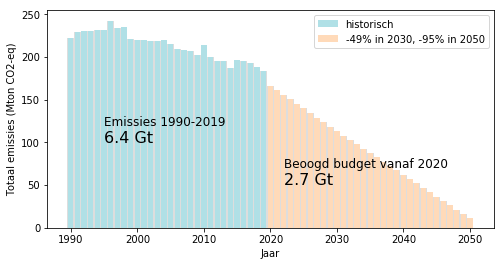

In [226]:
plt.figure(figsize=(8,4))
#lw=2

def plot_bar(x, y, color, label=None):
    # Helper function to add grey shading on background
    plt.bar(x, y, width=1, color=c_dict['edge'])
    plt.bar(x, y, label=label, color=color)

plot_bar(df_emis_NL.index, df_emis_NL, color=c_dict['hist'], label='historisch')
    
    
plot_bar(years1, emissies1, label='-49% in 2030, -95% in 2050', color=c_dict['future'])
plot_bar(years2, emissies2,  color = c_dict['future'])

#plt.bar(years1, emissies1,  label='-49% in 2030, -95% in 2050', color=c_dict['future'])
#plt.bar(years2, emissies2,  color = c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = (np.sum(emissies1) + np.sum(emissies2)) / 1e3
plt.text(2022,70,s=f'Beoogd budget vanaf 2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.savefig('voorgenomen.png',dpi=200)

We tellen nu de emissies in alle jaren (2020-2050) bij elkaar op om tot een totaal te komen

In [60]:
np.sum(emissies1)  + np.sum(emissies2)

2726.394121453407

# Koolstofbudget berekeningen

Eerst wat algemene variabelen uitrekenen.

In [75]:
inwoners_NL = 17.4e6 # 1-1-2019, https://en.wikipedia.org/wiki/Netherlands
inwoners_wereld = 7.8e9 # maart 2020, https://en.wikipedia.org/wiki/World_population

inwoners_NL_frac_wereld = inwoners_NL / inwoners_wereld 

print('Bevolking NL als percentage wereldbevolking: {:.2f} %'.format(inwoners_NL_frac_wereld*100))

Bevolking NL als percentage wereldbevolking: 0.22 %


In het Urgenda-vonnis werd bepaald: 25% reductie in 2020 t.o.v. 1990

In [135]:
emis_Urgenda = df_emis_NL[1990] * 0.75 # 
print(f'Emissies NL in 2020: {emis_Urgenda:.1f} Mton')

Emissies NL in 2020: 166.2 Mton


## Berekening 1: Parijs 1,75 graad (66% kans)

*Dit is een interpretatie van de doelstelling "ruim onder 2 graden" uit het Klimaatakkoord van Parijs.*

Aannames: 
* Mondiale koolstofbudget uit: IPCC SR1, tabel 2.2. 
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs
* Het Urgenda-vonnis wordt gehaald, waarmee de emissies in 2020 uitkomen op 166,2 Mton

In [98]:
budget_2018 = 800 * 1e9/1e6 # Gt naar Mton, begin 2018
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 880000 Mton


In [95]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 1963 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [133]:
budget_NL_2020 = budget_NL_2016 - df_emis_NL[[2016,2017,2018,2019]].sum()
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 1202 Mton


Met huidige emissies (2020 / Urgenda) na hoeveel jaren is het budget op? 

In [136]:
budget_NL_2020 / emis_Urgenda

7.231608860003495

Gegeven het budget, dit is de tijd die we hebben om de emissies lineair naar nul te brengen. Het aantal is INCLUSIEF het startjaar, te weten 2020

In [108]:
jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
jaren_tot_nul

14

Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

In [143]:
df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
df[2020] = emis_Urgenda
df[df.index[-1]] = 0
df_1p75_lin = df.interpolate()
df_1p75_lin

2020    166.243544
2021    153.455579
2022    140.667614
2023    127.879649
2024    115.091684
2025    102.303719
2026     89.515754
2027     76.727790
2028     63.939825
2029     51.151860
2030     38.363895
2031     25.575930
2032     12.787965
2033      0.000000
dtype: float64

In [150]:
print(f'Lineaire emissiedaling naar nul in {df_1p75_lin.index[-1]}: {df_1p75_lin.sum():.0f} Mton')
print(f'Restant door afronding: {budget_NL_2020-df_1p75_lin.sum():.0f} Mton')

Lineaire emissiedaling naar nul in 2033: 1164 Mton
Restant door afronding: 39 Mton


Text(2022, 50, '1.2 Gt')

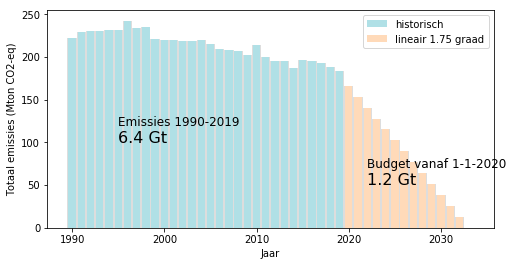

In [227]:
plt.figure(figsize=(8,4))

plot_bar(df_emis_NL.index, df_emis_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p75_lin.index, df_1p75_lin, label='lineair 1.75 graad', color=c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p75_lin.sum() / 1e3
plt.text(2022,70,s=f'Budget vanaf 1-1-2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

Jaarlijkse emissie reductie als % van het jaar 2019 en 2020. 

In [164]:
perc = (df_1p75_lin[2020]-df_1p75_lin[2021]) / df_emis_NL[2019] * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2019')

perc = (df_1p75_lin[2020]-df_1p75_lin[2021]) / emis_Urgenda * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2020')

Jaarlijkse emissie reductie: 7.0 % van peiljaar 2019
Jaarlijkse emissie reductie: 7.7 % van peiljaar 2020


## Berekening 2: Parijs 1,5 graad (66% kans)

*waarbij ook rekening wordt gehouden met terugkoppelingen in het aardsysteem (Earth System Feedbacks). <br>
Dit is de eis van Fridays For Future in hun open brief [Face The Climate Emergency](https://climateemergencyeu.org/).<br>
Onder de mede-ondertekenaars bevinden zich ook vele wetenschappers, waaronder Stefan Rahmstorf en Volker Quaschning van Scientists For Future.*


Aannames: 
* Mondiale koolstofbudget uit: IPCC SR1, tabel 2.2.
* Volgens dezelfde tabel: Earth System Feedbacks: reduce budgets by ~100 Gt
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs

In [228]:
budget_2018 = 420 * 1e3 # Mton, begin 2018
correctie_feedbacks = -100 * 1e3 # Earth System Feedbacks
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016 + correctie_feedbacks

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 400000 Mton


In [229]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 892 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [237]:
#budget_NL_2020 = budget_NL_2016 - df_emis_NL[[2016,2017,2018,2019]].sum()

budget_NL_2020 = (budget_2016 - 160e3 ) * inwoners_NL_frac_wereld # Alternatief: taart verdelen vanaf 1.1.2020
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 535 Mton


Met huidige emissies (2020 / Urgenda) na hoeveel jaren is het budget op? 

In [235]:
budget_NL_2020 / emis_Urgenda

3.2204836502607397

Gegeven het budget, dit is de tijd die we hebben om de emissies lineair naar nul te brengen. Het aantal is INCLUSIEF het startjaar, te weten 2020

In [232]:
jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
jaren_tot_nul

1

Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

In [143]:
df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
df[2020] = emis_Urgenda
df[df.index[-1]] = 0
df_1p75_lin = df.interpolate()
df_1p75_lin

2020    166.243544
2021    153.455579
2022    140.667614
2023    127.879649
2024    115.091684
2025    102.303719
2026     89.515754
2027     76.727790
2028     63.939825
2029     51.151860
2030     38.363895
2031     25.575930
2032     12.787965
2033      0.000000
dtype: float64

In [150]:
print(f'Lineaire emissiedaling naar nul in {df_1p75_lin.index[-1]}: {df_1p75_lin.sum():.0f} Mton')
print(f'Restant door afronding: {budget_NL_2020-df_1p75_lin.sum():.0f} Mton')

Lineaire emissiedaling naar nul in 2033: 1164 Mton
Restant door afronding: 39 Mton


Text(2022, 50, '1.2 Gt')

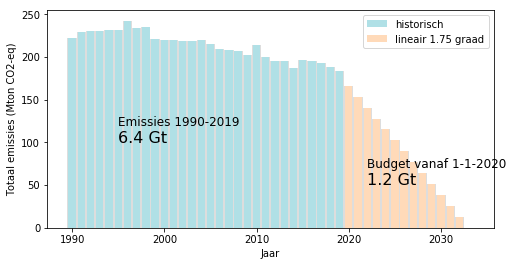

In [227]:
plt.figure(figsize=(8,4))

plot_bar(df_emis_NL.index, df_emis_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p75_lin.index, df_1p75_lin, label='lineair 1.75 graad', color=c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p75_lin.sum() / 1e3
plt.text(2022,70,s=f'Budget vanaf 1-1-2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})